In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on data provided by LendingClub 

https://www.lendingclub.com
    
### The dataset was provided by Kaggle and contains information on loan borrowers 
collected by LendingClub from the year 2007 to 2010. 



Listing of attributes:
    
* credit.policy: a set of guidelines and criteria that decides on credit limits, credit terms, and how to go about delinquent accounts. The borrower either meets the criteria (represented by the integer 1 in our data) or does not (represented by 0 in our data).
* purpose: purpose of the loan contracted (a.i: installment, debt consolidation)
* int.rate: interest rate on the loan.
* installment: monthly payment owed by the borrower.
* log.annual.inc: natural logarithm of self-reported income.
* dti: Debt-to-Income ratio
* fico: FICO score of loan borrowers
* days.with.cr.line: number of days with line of credit.
* revol.bal: revolving balance or the portion of credit that remains unpaid after billing cycle.
* revol.util: revolving utilization or debt-to-limit ratio, debt divided by credit limit.
* inq.last.6mths: inquiries during last 6 months. Inquiries happen when a financial institution checks your credit to make a lending decision, this usually happens when you apply for credit. There are two types of inquiries: hard inquiries or ‘hard pulls’ when you apply for mortgage, credit card… and soft inquiries or ‘soft pulls’ for credit card offers or employment. For the purpose of this project, we will consider the data to represent ‘hard pulls’.
* delinq.2yrs: number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* pub.rec: number of derogatory public records of loan borrowers.
* not.fully.paid: this column shows whether a loan was not fully paid (1) or fully paid (0)

### Build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan)

Use the models of Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


In [4]:
df = pd.read_csv("lendingclub_loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


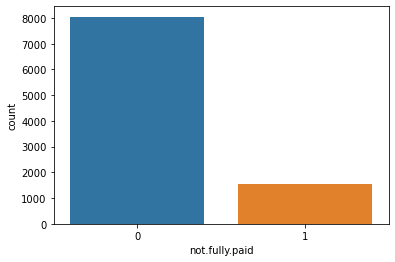

In [5]:
sns.countplot(df['not.fully.paid'])

In [6]:
df.shape

(9581, 14)

In [7]:
# EDA (chekcing missing values)
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment           True
log.annual.inc        True
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [8]:
bad_data = df [np.isnan(df.installment)]
bad_data.shape

(1, 14)

In [9]:
bad_data2 = df [np.isnan(df['log.annual.inc'])]
bad_data2.shape

(1, 14)

In [10]:
# EDA (removing missing values)
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(9581, 14)
(9580, 14)


In [11]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [12]:
#sns.pairplot(df)

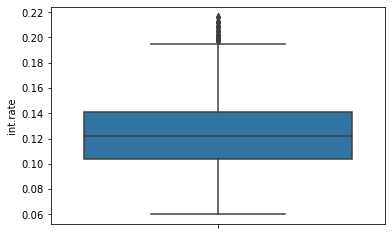

In [13]:
# EDA (chekcing outliers)
sns.boxplot(y=df['int.rate'])

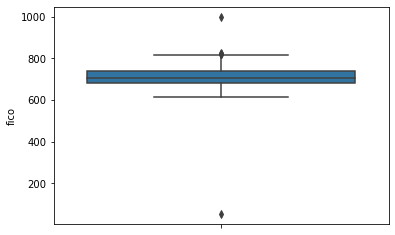

In [14]:
# EDA (chekcing outliers)
sns.boxplot(y=df['fico'])

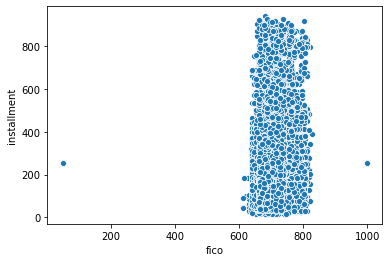

In [15]:
# EDA (another way for chekcing outliers)
sns.scatterplot(x='fico', y = 'installment', data=df)

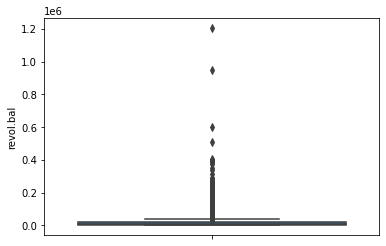

In [16]:
# EDA (chekcing outliers)
sns.boxplot(y=df['revol.bal'])

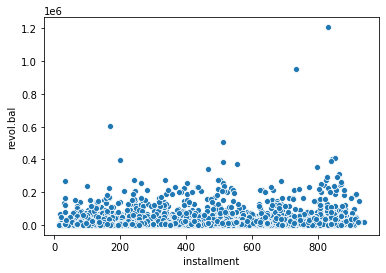

In [17]:
# EDA (chekcing outliers using scatterplot)
sns.scatterplot(x='installment', y = 'revol.bal', data=df)

In [18]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000,9.580000e+03,9580.000000,9580.000000,9580.000000,9580.000000,9580.000000
mean,0.805010,0.122642,319.075737,10.932306,12.605959,710.807411,4560.712339,1.691150e+04,46.793265,1.577557,0.163883,0.062109,0.160021
std,0.396213,0.026845,207.051846,0.614887,6.883431,38.674520,2496.672583,3.375310e+04,29.014330,2.200024,0.546292,0.262100,0.366645
min,0.000000,0.060000,15.670000,7.547502,0.000000,50.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.217500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.929887,12.660000,707.000000,4139.958333,8.593000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.487500,11.294769,17.950000,737.000000,5730.000000,1.824450e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,999.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [19]:
df[df['fico'] > 850]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
13,1,debt_consolidation,0.1324,253.58,11.835009,9.16,999,4298.0,5122,18.2,2,1,0,0


In [20]:
df[df['fico'] < 300]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
12,1,debt_consolidation,0.1324,253.58,11.835009,9.16,50,4298.0,5122,18.2,2,1,0,0


In [21]:
# EDA (removing outliers)
print(df.shape)
is_between = np.logical_and(df['fico'] < 850, df['fico'] > 300)
df = df[is_between]
print(df.shape)

(9580, 14)
(9578, 14)


In [22]:
df[df['revol.bal'] > 800000]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9045,0,small_business,0.2011,735.06,13.304685,14.39,672,7620.000000,952013,99.0,6,0,0,0
9538,0,small_business,0.1496,831.52,12.765688,11.38,717,8520.041667,1207359,56.0,7,0,0,1


In [23]:
# EDA (removing outliers)
df = df[df['revol.bal'] < 800000]
print(df.shape)

(9576, 14)


In [24]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [25]:
df['not.fully.paid'].shape

(9576,)

In [26]:
df.groupby('not.fully.paid').mean()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,
0,0.832422,0.120760,314.521850,10.940797,12.494177,713.332049,4592.256273,16006.378046,45.752990,1.433366,0.161611,0.056564
1,0.661880,0.132441,342.466097,10.883795,13.197023,697.815927,4390.847721,20291.951044,52.252631,2.327676,0.174935,0.091384


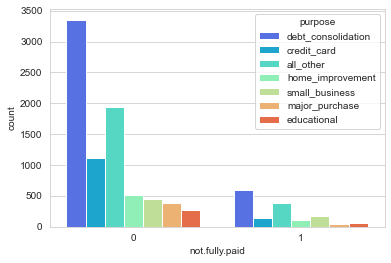

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='not.fully.paid',hue='purpose',data=df,palette='rainbow')

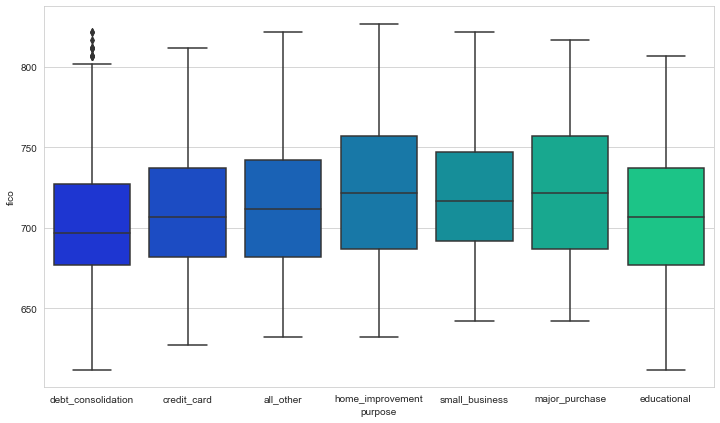

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='purpose',y='fico',data=df,palette='winter')

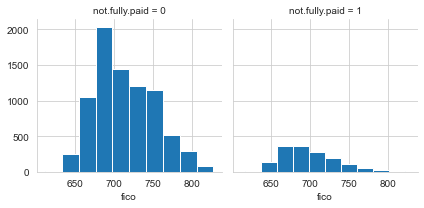

In [29]:
histo = sns.FacetGrid(df, col = 'not.fully.paid')
histo = histo.map(plt.hist, 'fico', bins=10)

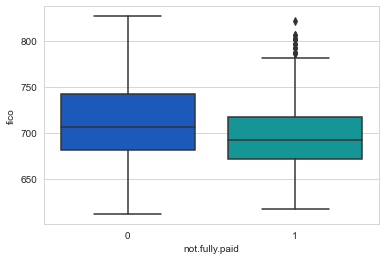

In [30]:
sns.boxplot(x='not.fully.paid',y='fico',data=df,palette='winter')

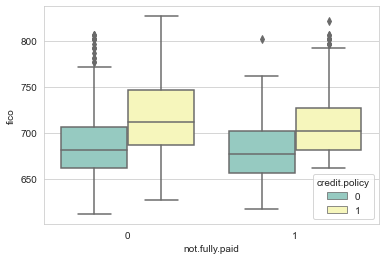

In [31]:
sns.boxplot(x="not.fully.paid", y="fico", hue="credit.policy", data=df, palette="Set3")

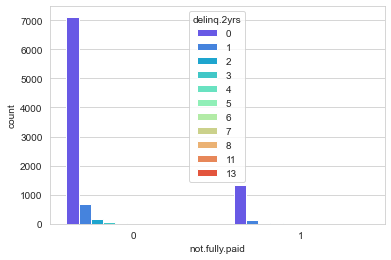

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='not.fully.paid',hue='delinq.2yrs',data=df,palette='rainbow')

In [33]:
# separated data set into training and testing
df2 = df[['credit.policy', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']]
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('not.fully.paid',axis=1), 
                                                    df2['not.fully.paid'], test_size=0.20, 
                                                    random_state=101)

In [34]:
# Do Logistic Regression first time without dummy variables
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1622
           1       0.67      0.01      0.03       294

    accuracy                           0.85      1916
   macro avg       0.76      0.51      0.47      1916
weighted avg       0.82      0.85      0.78      1916

0.8475991649269311


In [35]:
# setup dummy variables to take care categorical variables
purpose = pd.get_dummies(df['purpose'],drop_first=True)

In [36]:
df2 = pd.concat([df2, purpose], axis=1)
df2.head()

,credit.policy,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [37]:
# normalize numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_features = df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']]
numerical_features.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5


In [38]:
scaler = StandardScaler()
normalized_df = scaler.fit_transform(numerical_features)
normalized_df = pd.DataFrame(normalized_df, index = df.index, columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util'] )
normalized_df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,-0.138962,2.464618,0.681879,0.998415,0.688702,0.432569,0.405345,0.182937
1,-0.578687,-0.438573,0.245024,0.244525,-0.101388,-0.721012,0.564289,1.030895
2,0.487086,0.231275,-0.908979,-0.141862,-0.759795,0.060069,-0.439306,-0.730513
3,-0.813455,-0.756877,0.681879,-0.654624,0.030294,-0.745062,0.565756,0.910251
4,0.744213,-1.043968,0.599358,0.343300,-1.154840,-0.197888,-0.398345,-0.251382


In [39]:
minMaxScaler = MinMaxScaler()
minMax_df = minMaxScaler.fit_transform(numerical_features)
minMax_df = pd.DataFrame(minMax_df, index = df.index, columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util'] )
minMax_df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.047889,0.437815
1,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.055804,0.644538
2,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.005827,0.215126
3,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.055877,0.615126
4,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.007867,0.331933


In [40]:
rest = df[['credit.policy', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']]
df3 = pd.concat([minMax_df, purpose, rest], axis=1)
df3.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.047889,0.437815,0,1,0,0,0,0,1,0,0,0,0
1,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.055804,0.644538,1,0,0,0,0,0,1,0,0,0,0
2,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.005827,0.215126,0,1,0,0,0,0,1,1,0,0,0
3,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.055877,0.615126,0,1,0,0,0,0,1,1,0,0,0
4,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.007867,0.331933,1,0,0,0,0,0,1,0,1,0,0


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(df3.drop('not.fully.paid',axis=1), 
                                                    df3['not.fully.paid'], test_size=0.20, 
                                                    random_state=101)

# now train the models with dummy variables and normalized data
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1622
           1       0.67      0.03      0.05       294

    accuracy                           0.85      1916
   macro avg       0.76      0.51      0.49      1916
weighted avg       0.82      0.85      0.78      1916

0.848643006263048


In [42]:
# Support Vector Machine
# Try rbf as kernel and Gamma of 2
model = svm.SVC(kernel='rbf', C=1, gamma=2)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1622
           1       0.28      0.02      0.03       294

    accuracy                           0.84      1916
   macro avg       0.56      0.50      0.47      1916
weighted avg       0.76      0.84      0.78      1916

0.8423799582463466


In [43]:
# Try rbf as kernel, C=100000 and Gamma of 2**5
model = svm.SVC(kernel='rbf', C=100000, gamma=2**5)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1622
           1       0.11      0.03      0.05       294

    accuracy                           0.81      1916
   macro avg       0.48      0.49      0.47      1916
weighted avg       0.73      0.81      0.77      1916

0.8115866388308977


In [44]:
# Build a Decision Tree Classifier using default parameter
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[1334  288]
 [ 235   59]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1622
           1       0.17      0.20      0.18       294

    accuracy                           0.73      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.75      0.73      0.74      1916

0.7270354906054279


In [45]:
# Build a Decision Tree Classifier using max_depth = 6 and crierion = 'entropy'
model = DecisionTreeClassifier(max_depth=6, criterion='entropy')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[1602   20]
 [ 287    7]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1622
           1       0.26      0.02      0.04       294

    accuracy                           0.84      1916
   macro avg       0.55      0.51      0.48      1916
weighted avg       0.76      0.84      0.78      1916

0.8397703549060542


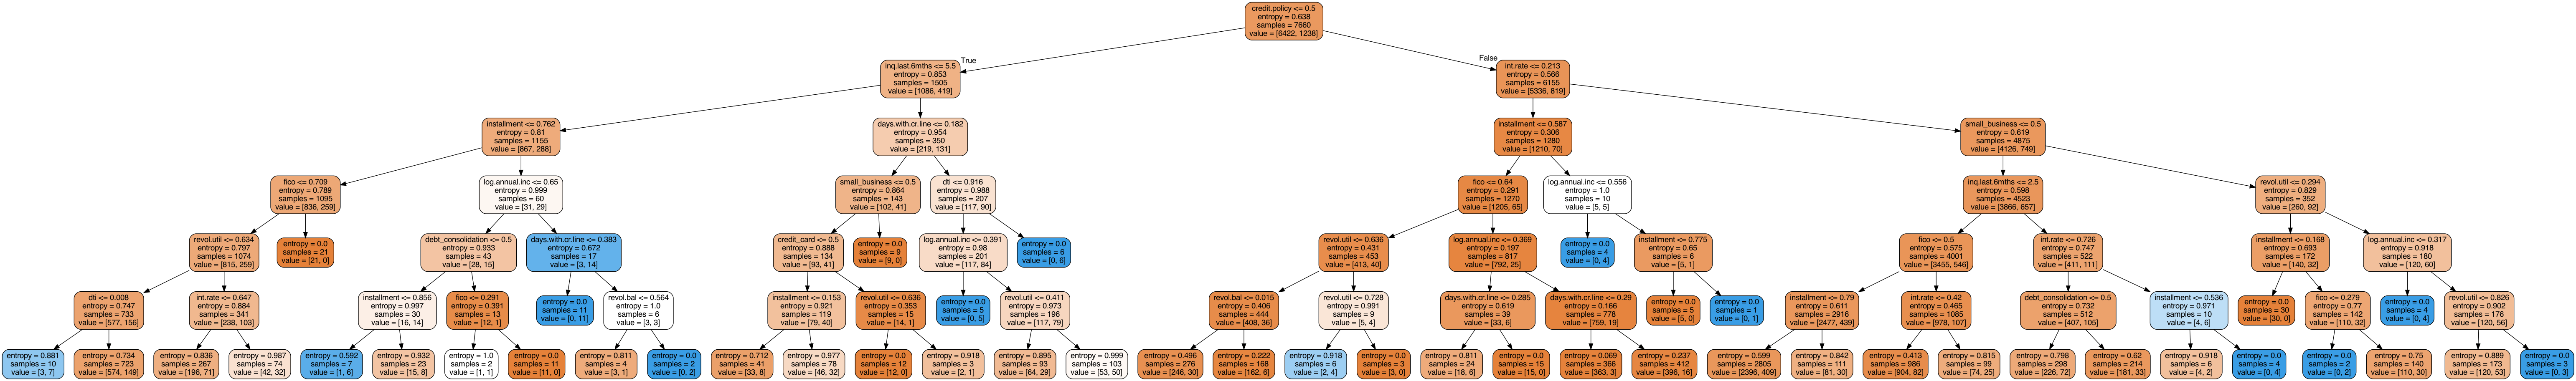

In [46]:
# Tree Visualization for a Decision Tree Classifier using max_depth = 6 and crierion = 'entropy'
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot
features = list(df3.drop(['not.fully.paid'],axis=1).columns)
model = DecisionTreeClassifier(max_depth=6, criterion='entropy')
model.fit(X_train,Y_train)
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [47]:
# Build a Decision Tree Classifier using max_depth = 30 and crierion = 'entropy'
model = DecisionTreeClassifier(max_depth=30, criterion='entropy')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[1353  269]
 [ 225   69]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1622
           1       0.20      0.23      0.22       294

    accuracy                           0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.76      0.74      0.75      1916

0.7421711899791231


In [48]:
# build a Random Forest Classifier with 100 trees
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1622
           1       0.53      0.03      0.06       294

    accuracy                           0.85      1916
   macro avg       0.69      0.51      0.49      1916
weighted avg       0.80      0.85      0.79      1916

0.8470772442588727


In [49]:
# Do a 10-fold cross validation of Decision Tree Classifier
import random
from sklearn.model_selection import cross_val_score
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df3.drop('not.fully.paid',axis=1), 
                                                    df3['not.fully.paid'], test_size=0.20, 
                                                    random_state = random.randint(1,1000))
    
    model = DecisionTreeClassifier(max_depth=30, criterion='entropy')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1615
           1       0.20      0.23      0.21       301

    accuracy                           0.73      1916
   macro avg       0.52      0.53      0.53      1916
weighted avg       0.75      0.73      0.74      1916

0.7343423799582464
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1608
           1       0.23      0.22      0.22       308

    accuracy                           0.76      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.75      0.76      0.75      1916

0.7567849686847599
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1637
           1       0.16      0.19      0.17       279

    accuracy                           0.74      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.76      0.74   

In [50]:
# Do a 10-fold cross validation wirh different max_depth
import random
X_train, X_test, Y_train, Y_test = train_test_split(df3.drop('not.fully.paid',axis=1), 
                                                    df3['not.fully.paid'], test_size=0.20, 
                                                    random_state = random.randint(1,1000))
for i in range(10):
    
    
    model = DecisionTreeClassifier(max_depth=(i+1)*5, criterion='entropy')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('the max_depth with ', (i+1)*5)
    print(classification_report(Y_test,Y_pred))
    print(accuracy_score(Y_test, Y_pred))

the max_depth with  5
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1601
           1       0.39      0.03      0.05       315

    accuracy                           0.83      1916
   macro avg       0.61      0.51      0.48      1916
weighted avg       0.76      0.83      0.77      1916

0.8329853862212944
the max_depth with  10
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1601
           1       0.32      0.07      0.12       315

    accuracy                           0.82      1916
   macro avg       0.58      0.52      0.51      1916
weighted avg       0.76      0.82      0.77      1916

0.8215031315240083
the max_depth with  15
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1601
           1       0.24      0.14      0.17       315

    accuracy                           0.79      1916
   macro avg       0.5

I have tried four different models to train. DecisionTreeClassifier can get the highest f1-score among these four.
So I use DecisionTree model to do 10-fold cross validation.
The first 10-fold cross validation is using different train and test set each time with same max_depth.
The second 10-fold cross validation is using different max_depth eaxch time.
When I do 10-fold cross validation with different max_depth, the max_depth = 50 has the highest f1-score which is 0.23